# Project PR5

In the paper we have undertaken, the K-means Clustering Data Mining method was employed to group the obtained data into clusters. This process was implemented using Python, with the data utilized being country statistics, area of recorded laboratory-confirmed cases of COVID-19, and April 2020 deaths from the World Health Organization (WHO). The resulting clusters were classified as high (1), medium (2), and low (0).

### We further expanded the paper by adding 4 questions:

1. Can the SEARO region be divided into clusters using the K-means algorithm?
2. Is K-means an appropriate algorithm for this task?
3. Are the chosen variables adequate for obtaining meaningful results?
4. Which of the two clustering methods is more efficient?
5. How our results will be affected if we took under consideration the whole world for the years 2020,2021,2022? 

this is a command used in Jupyter notebook to run the code of another notebook file. This command allows you to run the code of the "setup.ipynb" notebook as if it were in the current notebook. This can be useful for running common setup code, such as importing libraries or setting global variables, before running the code in the current notebook.

In [1]:
%%capture
%run setup.ipynb

We imported the dataset from the WHO, then we created a csv with the population of all the countries, after checking for shape and column, we used the command Merge to create a new dataset that cointained all the information of interest. 

In [2]:
data= pd.read_csv(f'{DATA_PATH}/WHO-COVID-19-global-data.csv', delimiter=",",index_col=False)
country= pd.read_csv(f'{DATA_PATH}/Country_with_population.csv',delimiter=';',index_col=False)
Cordinates= pd.read_csv(f'{DATA_PATH}/Cordinates.csv',delimiter=",")

The code is used to check the dimensions of the DataFrame `data` and display the first 5 rows of the DataFrame.

The `shape` attribute returns a tuple representing the dimensionality of the DataFrame. The first element of the tuple is the number of rows, and the second element is the number of columns.

The `head()` method returns the first n rows of the DataFrame, where n is the number of rows specified in the method. If no number is specified, it will return the first 5 rows by default.


In [3]:
print(data.shape)
data.head()

(253116, 8)


,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0


In [4]:
print(Cordinates.shape)
Cordinates.head()

(244, 4)


,Code,latitude,longitude,Country
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla


In [5]:
print(country.shape)
country.head()

(195, 2)


,Country,Population
0,Afghanistan,38041754
1,Albania,2854191
2,Algeria,43053054
3,Andorra,77142
4,Angola,31825295


The following is used to merge two DataFrames, `data` and `country`, on the 'Country' column. The resulting DataFrame is stored in the variable 'merge'.

The `pd.merge()` function is used to merge two DataFrames on one or more key columns. The `left` parameter specifies the DataFrame that should be used as the left table in the merge, and the `right` parameter specifies the DataFrame that should be used as the right table. The `on` parameter specifies the column(s) on which to perform the merge.

In [6]:
merge=pd.merge(left=data,right=country,on='Country')
print(merge.shape)
merge.head()

(184764, 9)


,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Population
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0,38041754
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0,38041754
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0,38041754
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0,38041754
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0,38041754


The code above is used to check for missing values in the DataFrame 'merge'.

The `pd.isnull()` function is used to check for missing values in the DataFrame and returns a DataFrame of the same shape with Boolean values indicating the presence of missing values.

The `.sum()` method is used to count the number of 'True' values in each column, which represents the number of missing values in each column.

This allows the user to quickly identify which columns have missing values and how many missing values each column has.


In [7]:
pd.isnull(merge).sum()

Date_reported           0
Country_code         1068
Country                 0
WHO_region              0
New_cases               0
Cumulative_cases        0
New_deaths              0
Cumulative_deaths       0
Population              0
dtype: int64

Removing all the null values and creating a new dataset "clean"

In [8]:
clean=merge.dropna()
clean=pd.DataFrame(clean)

Confronting the size of the old and the new dataset

In [9]:
print(clean.count())
merge.count()

Date_reported        183696
Country_code         183696
Country              183696
WHO_region           183696
New_cases            183696
Cumulative_cases     183696
New_deaths           183696
Cumulative_deaths    183696
Population           183696
dtype: int64


Date_reported        184764
Country_code         183696
Country              184764
WHO_region           184764
New_cases            184764
Cumulative_cases     184764
New_deaths           184764
Cumulative_deaths    184764
Population           184764
dtype: int64

checking for duplicate values

In [10]:
clean.duplicated().count()

183696

In [11]:
merge2=pd.merge(left=clean,right=Cordinates,on='Country')
print(merge2.shape)
merge2.head()

(178356, 12)


,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Population,Code,latitude,longitude
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0,38041754,AF,33.93911,67.709953
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0,38041754,AF,33.93911,67.709953
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0,38041754,AF,33.93911,67.709953
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0,38041754,AF,33.93911,67.709953
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0,38041754,AF,33.93911,67.709953


In [12]:
pd.isnull(merge2).sum()

Date_reported        0
Country_code         0
Country              0
WHO_region           0
New_cases            0
Cumulative_cases     0
New_deaths           0
Cumulative_deaths    0
Population           0
Code                 0
latitude             0
longitude            0
dtype: int64

In [13]:
merge2.duplicated().count()

178356

This code is used to filter and clean the COVID-19 case data for a specific region. 
It filters the DataFrame 'clean' to only include the rows with WHO region equal to "SEARO" and store it in the DataFrame 'South_East_Asia'.
Then it filters the DataFrame 'South_East_Asia' to only include cases reported on March 31st, 2020 and April 30th, 2020, and store it in the DataFrame 'SEA'.
Next, it calculates the number of cases and deaths in the period between the two dates using the `diff()` function and store these values in new columns called 'Period_deaths' and 'Period_cases' in the 'SEA' DataFrame.
Then it filters the DataFrame 'SEA' to only include the cases reported on April 30th, 2020 and store it in the DataFrame 'dg' and display it


In [14]:
South_East_Asia=clean[clean["WHO_region"]=="SEARO"]
South_East_Asia=pd.DataFrame(South_East_Asia)
SEA=South_East_Asia[South_East_Asia['Date_reported'].isin(['2020-04-30','2020-03-31'])]
df=SEA
df=pd.DataFrame(df)
dc= df['Cumulative_cases'].diff(1)
dd= df['Cumulative_deaths'].diff(1)
df['Period_deaths']=dd
df['Period_cases']=dc
dg=df[df['Date_reported']=='2020-04-30']
dg=pd.DataFrame(dg)
display(dg)

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Population,Period_deaths,Period_cases
14002,2020-04-30,BD,Bangladesh,SEARO,564,7667,5,168,167310838,163.0,7616.0
20410,2020-04-30,BT,Bhutan,SEARO,0,7,0,0,727145,0.0,3.0
78082,2020-04-30,IN,India,SEARO,1718,33050,67,1074,1366417754,1042.0,31799.0
79150,2020-04-30,ID,Indonesia,SEARO,347,10118,8,792,270203917,656.0,8590.0
105850,2020-04-30,MV,Maldives,SEARO,140,396,0,0,530953,0.0,378.0
118666,2020-04-30,MM,Myanmar,SEARO,0,150,1,6,54045420,5.0,136.0
120802,2020-04-30,NP,Nepal,SEARO,0,57,0,0,28608710,0.0,52.0
160318,2020-04-30,LK,Sri Lanka,SEARO,30,649,0,7,21803000,5.0,527.0
166726,2020-04-30,TH,Thailand,SEARO,7,2954,0,54,69625582,44.0,1303.0
168862,2020-04-30,TL,Timor-Leste,SEARO,0,24,0,0,3500000,0.0,23.0


We dropped the irrelevant columns and created the columns, Cases and Death per capita.

In [15]:
dg=dg.drop(columns=['Country_code','New_cases','New_deaths'], axis=1)
dg['Population']=dg['Population'].astype(int)
dg['Cases_per_Capita']=(dg['Cumulative_cases'].div(dg['Population']))*100000
dg['Death_per_Capita']=(dg['Cumulative_deaths'].div(dg['Population']))*100000

export table in csv format

In [16]:
dg.to_csv(f'{RESULTS_PATH}/dati_paper.csv')

We created a scatter plot using the Seaborn library, representing the relationship between the cumulative cases and cumulative deaths of COVID-19 in the countries of South-East Asia using the data stored in the 'dg' DataFrame.

The `sns.scatterplot()` function creates the scatter plot, with the x-axis set to the 'Cumulative_cases' column, the y-axis set to the 'Cumulative_deaths' column and the data points are colored according to the 'Country' column.

The `plt.legend()` function is used to place the legend outside the plot and the `loc` parameter is set to 'upper left' to place the legend in the upper left corner of the plot.

The `plt.title()` function is used to add a title to the plot.

The `plt.savefig()` function is used to save the figure of the plot with the specified name and resolution.


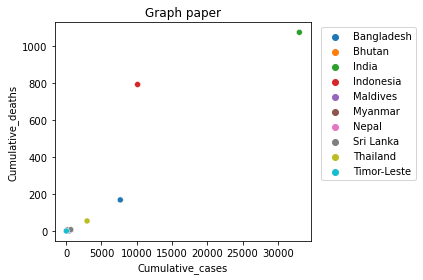

In [17]:
sns.scatterplot(x = dg['Cumulative_cases'], y = dg['Cumulative_deaths'], data=dg, hue='Country')
plt.legend(bbox_to_anchor=(1.02, 1),loc='upper left')
plt.title('Graph paper')
plt.tight_layout()
plt.savefig(f'{FIGURES_PATH}/Plot_dati_paper_1',dpi=300)

##### In order to implement the k-means clustering we created two function: 
1. In the first one we created a plot which enable us to visualize the most efficient number of cluster
2. In the second one we created the actual K-means cluster

1: defines a function called `SSE_plot()` that takes in 4 parameters: 
-data: a DataFrame with the data for which the cluster analysis is to be performed
-var1: a string representing the name of the first variable to be used for clustering
-var2: a string representing the name of the second variable to be used for clustering
-name: a string representing the name of the plot that will be generated

The function then creates an empty list called 'sse' which will store the sum of squared errors for each value of k. 
Then it uses a for loop to iterate through the range of possible number of clusters, where k ranges from 1 to the number of countries in the data. 
For each value of k, it creates a KMeans object, fits the model to the data using the var1 and var2 columns, and stores the 'inertia_' attribute, which represents the sum of squared errors, in the 'sse' list.

Then it creates a plot of 'K' on the x-axis and 'Sum of squared error' on the y-axis, using the 'k_rng' and 'sse' lists.
It sets the x limit of the plot to 0 and 10 to make it more readable, and plots the points using the 'plot' function.
The function also adds a title to the plot using the 'name' parameter and saves the plot as an image with the same name in the 'Figures' folder.
It also shows the dataframe and print the execution time of the function


In [18]:

def SSE_plot (data,var1,var2,name):
    t1=time.time()
    sse = []
    k_rng = range(1,len(data.Country))
    for k in k_rng:
        km = KMeans(n_clusters=k)
        km.fit(data[[var1,var2]])
        sse.append(km.inertia_)
    plt.xlabel('K')
    plt.ylabel('Sum of squared error')
    plt.xlim(0,10)
    plt.plot(k_rng,sse)
    t2=time.time()
    plt.title(name)
    plt.tight_layout()
    plt.savefig(f'{FIGURES_PATH}/'+name,dpi=200)
    display(data)
    time_request=t2-t1
    print("execution time =", time_request)


,Date_reported,Country,WHO_region,Cumulative_cases,Cumulative_deaths,Population,Period_deaths,Period_cases,Cases_per_Capita,Death_per_Capita
14002,2020-04-30,Bangladesh,SEARO,7667,168,167310838,163.0,7616.0,4.582489,0.100412
20410,2020-04-30,Bhutan,SEARO,7,0,727145,0.0,3.0,0.962669,0.000000
78082,2020-04-30,India,SEARO,33050,1074,1366417754,1042.0,31799.0,2.418733,0.078600
79150,2020-04-30,Indonesia,SEARO,10118,792,270203917,656.0,8590.0,3.744579,0.293112
105850,2020-04-30,Maldives,SEARO,396,0,530953,0.0,378.0,74.582873,0.000000
118666,2020-04-30,Myanmar,SEARO,150,6,54045420,5.0,136.0,0.277544,0.011102
120802,2020-04-30,Nepal,SEARO,57,0,28608710,0.0,52.0,0.199240,0.000000
160318,2020-04-30,Sri Lanka,SEARO,649,7,21803000,5.0,527.0,2.976655,0.032106
166726,2020-04-30,Thailand,SEARO,2954,54,69625582,44.0,1303.0,4.242693,0.077558
168862,2020-04-30,Timor-Leste,SEARO,24,0,3500000,0.0,23.0,0.685714,0.000000


execution time = 0.22784733772277832


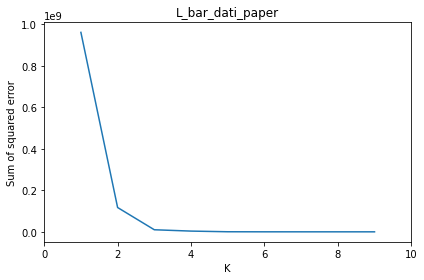

In [19]:
SSE_plot(dg,'Cumulative_cases','Cumulative_deaths','L_bar_dati_paper')

2: This code defines a function called k_means which takes in five parameters:

K: the number of clusters to create using the K-Means algorithm
data: the data set to be used for the clustering
var1 and var2: the names of the two columns in the data set that will be used for the clustering
name: a string that will be used as the title of the plot and to save the figure.
The function first uses the MinMaxScaler method to scale the values of var1 and var2 in the data set. Then, it creates an instance of the KMeans class with the number of clusters specified by the K parameter. The function then fits the data to the model and predicts the clusters that each data point belongs to. The cluster assignments are added as a new column to the dataframe. It then plots the data with the cluster assignment and cluster centers. The plot is labeled with the name passed as parameter and saved in the figures folder. It also returns the execution time for the clustering.

In [20]:
def k_means_base(K,data,var1,var2,name):
    t1=time.time()
    km = KMeans(n_clusters=K)
    y_predicted = km.fit_predict(data[[var1,var2]])
    data['cluster']=y_predicted
    km.cluster_centers_
    for i in range(0,K):
        df=data[data.cluster==i]
        plt.scatter(df[var1],df[var2])
    plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
    plt.xlabel(var1)
    plt.ylabel(var2)
    g=[]
    for i in range(0,K):
        g.append('cluster'+str(i))
    g.append('centroid')
    plt.legend(g,bbox_to_anchor=(1.02, 1), loc='upper left')
    plt.title(name)
    t2=time.time()
    plt.tight_layout()
    plt.savefig(f'{FIGURES_PATH}/'+name,dpi=200)
    display(data)
    time_request=t2-t1
    print("execution time =", time_request)
    
    

,Date_reported,Country,WHO_region,Cumulative_cases,Cumulative_deaths,Population,Period_deaths,Period_cases,Cases_per_Capita,Death_per_Capita,cluster
14002,2020-04-30,Bangladesh,SEARO,7667,168,167310838,163.0,7616.0,4.582489,0.100412,2
20410,2020-04-30,Bhutan,SEARO,7,0,727145,0.0,3.0,0.962669,0.000000,0
78082,2020-04-30,India,SEARO,33050,1074,1366417754,1042.0,31799.0,2.418733,0.078600,1
79150,2020-04-30,Indonesia,SEARO,10118,792,270203917,656.0,8590.0,3.744579,0.293112,2
105850,2020-04-30,Maldives,SEARO,396,0,530953,0.0,378.0,74.582873,0.000000,0
118666,2020-04-30,Myanmar,SEARO,150,6,54045420,5.0,136.0,0.277544,0.011102,0
120802,2020-04-30,Nepal,SEARO,57,0,28608710,0.0,52.0,0.199240,0.000000,0
160318,2020-04-30,Sri Lanka,SEARO,649,7,21803000,5.0,527.0,2.976655,0.032106,0
166726,2020-04-30,Thailand,SEARO,2954,54,69625582,44.0,1303.0,4.242693,0.077558,0
168862,2020-04-30,Timor-Leste,SEARO,24,0,3500000,0.0,23.0,0.685714,0.000000,0


execution time = 0.03564810752868652


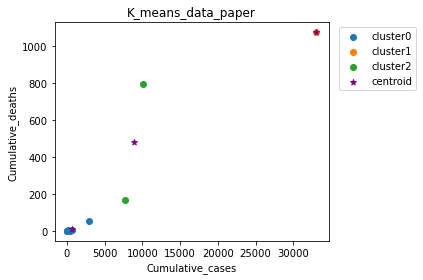

In [21]:
k_means_base(3,dg,'Cumulative_cases','Cumulative_deaths','K_means_data_paper')

In [22]:
def k_means(K,data,var1,var2,name):
    scaler = MinMaxScaler()
    scaler.fit(data[[var1]])
    data[var1] = scaler.transform(data[[var1]])
    scaler.fit(data[[var2]])
    data[var2] = scaler.transform(data[[var2]])
    t1=time.time()
    km = KMeans(n_clusters=K)
    y_predicted = km.fit_predict(data[[var1,var2]])
    data['cluster']=y_predicted
    km.cluster_centers_
    for i in range(0,K):
        df=data[data.cluster==i]
        plt.scatter(df[var1],df[var2])
    g=[]
    for i in range(0,K):
        g.append('cluster'+str(i))
    g.append('centroid')
    plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
    plt.xlabel(var1)
    plt.ylabel(var2)
    plt.legend(g,bbox_to_anchor=(1.02, 1), loc='upper left')
    plt.title(name)
    t2=time.time()
    plt.tight_layout()
    plt.savefig(f'{FIGURES_PATH}/'+name,dpi=200)
    display(data)
    time_request=t2-t1
    print("execution time =", time_request)

,Date_reported,Country,WHO_region,Cumulative_cases,Cumulative_deaths,Population,Period_deaths,Period_cases,Cases_per_Capita,Death_per_Capita,cluster
14002,2020-04-30,Bangladesh,SEARO,0.231819,0.156425,167310838,0.156430,0.239433,0.058928,0.342572,0
20410,2020-04-30,Bhutan,SEARO,0.000000,0.000000,727145,0.000000,0.000000,0.010263,0.000000,0
78082,2020-04-30,India,SEARO,1.000000,1.000000,1366417754,1.000000,1.000000,0.029838,0.268156,2
79150,2020-04-30,Indonesia,SEARO,0.305995,0.737430,270203917,0.629559,0.270065,0.047663,1.000000,1
105850,2020-04-30,Maldives,SEARO,0.011773,0.000000,530953,0.000000,0.011794,1.000000,0.000000,0
118666,2020-04-30,Myanmar,SEARO,0.004328,0.005587,54045420,0.004798,0.004183,0.001053,0.037876,0
120802,2020-04-30,Nepal,SEARO,0.001513,0.000000,28608710,0.000000,0.001541,0.000000,0.000000,0
160318,2020-04-30,Sri Lanka,SEARO,0.019429,0.006518,21803000,0.004798,0.016480,0.037339,0.109534,0
166726,2020-04-30,Thailand,SEARO,0.089187,0.050279,69625582,0.042226,0.040886,0.054359,0.264601,0
168862,2020-04-30,Timor-Leste,SEARO,0.000514,0.000000,3500000,0.000000,0.000629,0.006540,0.000000,0


execution time = 0.03803062438964844


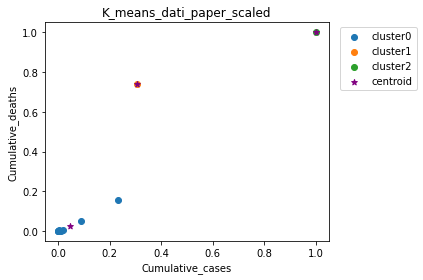

In [36]:
dg2=dg.copy()
k_means(3,dg,'Cumulative_cases','Cumulative_deaths','K_means_dati_paper_scaled')

### END OF THE  PAPER

The following code defines a function called `tree()` that takes in 5 parameters: 
- data: a DataFrame with the data for which the hierarchical clustering is to be performed
- x, y: integers representing the size of the plot
- fy: an integer representing the font size of the y ticks
- name: a string representing the name of the plot that will be generated

The function starts by normalizing the data using the MinMaxScaler function from sklearn to scale the data between 0 and 1.
It then drops the 'WHO_region' column from the dataframe. 
Then it calculates the pairwise euclidean distances between the rows in the dataframe, and uses the linkage function from the scipy.cluster.hierarchy library to create the linkage matrix.
It then plots the dendrogram using the dendrogram function from the same library and uses the Country column of the dataframe as the labels.
It also set the size of the plot and the font size of the y ticks.
It also adds a title to the plot using the 'name' parameter and saves the plot as an image with the same name in the 'Figures' folder.
It also shows the execution time of the function.


In [45]:
def tree(data,x,y,fy,name):
    
    try:
        scaler = MinMaxScaler()
        scaler.fit(data[['Cumulative_cases']])
        data['Cumulative_cases'] = scaler.transform(data[['Cumulative_cases']])
        scaler.fit(data[['Cumulative_deaths']])
        data['Cumulative_deaths'] = scaler.transform(data[['Cumulative_deaths']])
        scaler.fit(data[['Cases_per_Capita']])
        data['Cases_per_Capita'] = scaler.transform(data[['Cases_per_Capita']])
        scaler.fit(data[['Death_per_Capita']])
        data['Death_per_Capita'] = scaler.transform(data[['Death_per_Capita']])
        scaler.fit(data[['Period_cases']])
        data['Period_cases'] = scaler.transform(data[['Period_cases']])
        scaler.fit(data[['Period_deaths']])
        data['Period_deaths'] = scaler.transform(data[['Period_deaths']])  
    except:
        pass
    
    t1=time.time()
    dh=data.drop(columns=['Date_reported','Country','cluster','WHO_region'], axis=1)
    distances = pdist(dh, metric='euclidean')
    tree = hy.linkage(distances, method='single') 
    labels1=np.array(data['Country'])
    plt.figure(figsize=(x,y))
    dgram = hy.dendrogram(tree,truncate_mode='lastp',p=12, orientation='right',labels=labels1)
    plt.xlabel('Distances', size=fy)
    plt.yticks(fontsize=fy)
    t2=time.time()
    plt.title(name, size=fy)
    plt.tight_layout()
    plt.savefig(f'{FIGURES_PATH}/'+name,dpi=500)
    plt.tight_layout()
    time_request=t2-t1
    print("execution time =", time_request)


execution time = 0.02597808837890625


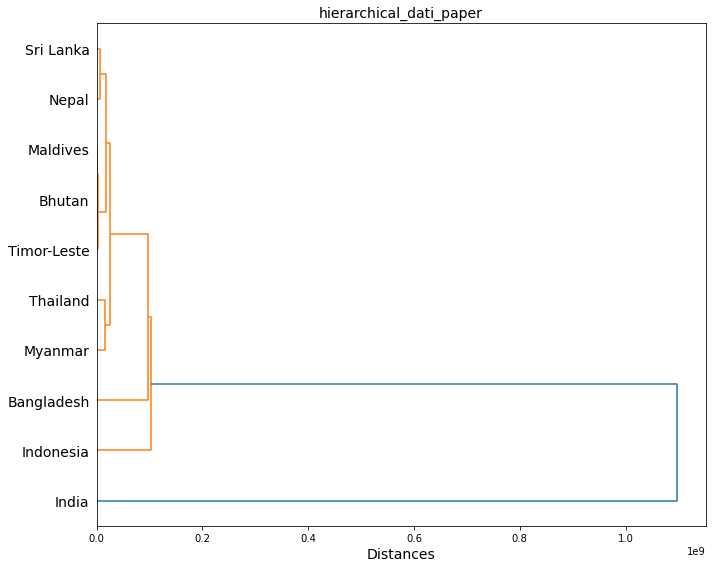

In [46]:
tree(dg,10,8,14,'hierarchical_dati_paper')

We implemented the tree function eliminating an outlier(India).

execution time = 0.018683195114135742


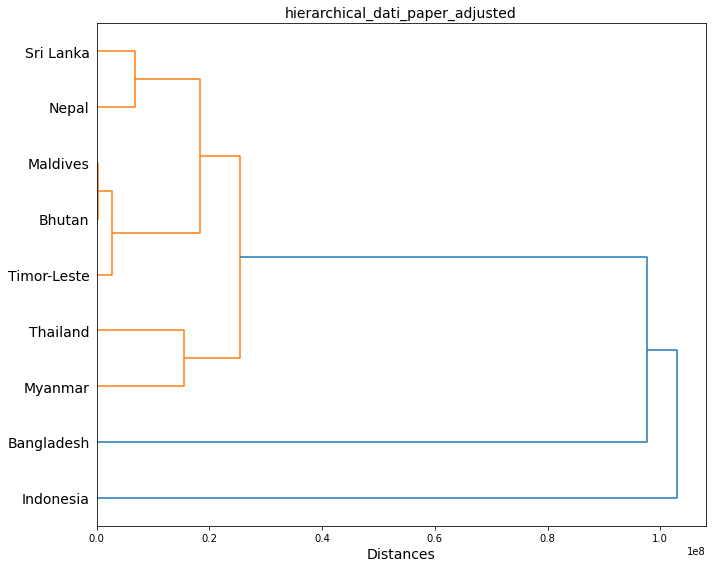

In [41]:
il=dg2[dg2["Country"]!="India"]
tree(il,10,8,14,'hierarchical_dati_paper_adjusted')

This code defines a function called corr2 which takes in two parameters:

data: the data set for which the correlation matrix is to be calculated
name: a string that will be used as the title of the plot and to save the figure.
The function calculates the correlation matrix of the data set using the corr() method. It then creates a heatmap of the correlation matrix using the sns.heatmap() function from the seaborn library, with the option to display the correlation coefficients on the cells of the heatmap. The heatmap is labeled with the name passed as parameter and saved in the figures folder. It also returns the execution time for the calculation of the correlation matrix.

In [27]:
def corr2(data,name):
    t1=time.time()
    corr2=data.corr()
    cmap = sns.diverging_palette(230, 20, as_cmap=True)
    sns.heatmap(corr2, annot=True,cmap=cmap)
    t2=time.time()
    time_request=t2-t1
    plt.title(name)
    plt.tight_layout()
    plt.savefig(f'{FIGURES_PATH}/'+name,dpi=200) 
    return corr2

,Cumulative_cases,Cumulative_deaths,Population,Period_deaths,Period_cases,Cases_per_Capita,Death_per_Capita
Cumulative_cases,1.000000,0.920806,0.987213,0.949258,0.998263,-0.152161,0.393461
Cumulative_deaths,0.920806,1.000000,0.880462,0.996497,0.907661,-0.165163,0.669041
Population,0.987213,0.880462,1.000000,0.916616,0.989200,-0.153150,0.269950
Period_deaths,0.949258,0.996497,0.916616,1.000000,0.938925,-0.163392,0.611045
Period_cases,0.998263,0.907661,0.989200,0.938925,1.000000,-0.145125,0.358154
Cases_per_Capita,-0.152161,-0.165163,-0.153150,-0.163392,-0.145125,1.000000,-0.183393
Death_per_Capita,0.393461,0.669041,0.269950,0.611045,0.358154,-0.183393,1.000000


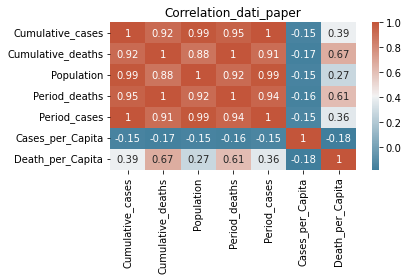

In [28]:
dg=dg.drop(columns=['cluster'],axis=1)
corr2(dg,'Correlation_dati_paper')

Using the matrix we choose two other variables (Cases and Death per capita) in order to check two non-correlated variable (in contrast with the choice of the paper), so we implemented the same analysis as before.

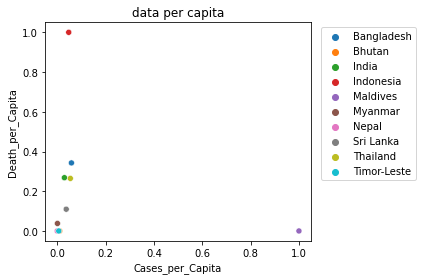

In [29]:
sns.scatterplot(x = dg['Cases_per_Capita'], y = dg['Death_per_Capita'], data=dg, hue='Country')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.title('data per capita')
plt.tight_layout()
plt.savefig(f'{FIGURES_PATH}/data_per_capita',dpi=300)

,Date_reported,Country,WHO_region,Cumulative_cases,Cumulative_deaths,Population,Period_deaths,Period_cases,Cases_per_Capita,Death_per_Capita
14002,2020-04-30,Bangladesh,SEARO,0.231819,0.156425,167310838,0.156430,0.239433,0.058928,0.342572
20410,2020-04-30,Bhutan,SEARO,0.000000,0.000000,727145,0.000000,0.000000,0.010263,0.000000
78082,2020-04-30,India,SEARO,1.000000,1.000000,1366417754,1.000000,1.000000,0.029838,0.268156
79150,2020-04-30,Indonesia,SEARO,0.305995,0.737430,270203917,0.629559,0.270065,0.047663,1.000000
105850,2020-04-30,Maldives,SEARO,0.011773,0.000000,530953,0.000000,0.011794,1.000000,0.000000
118666,2020-04-30,Myanmar,SEARO,0.004328,0.005587,54045420,0.004798,0.004183,0.001053,0.037876
120802,2020-04-30,Nepal,SEARO,0.001513,0.000000,28608710,0.000000,0.001541,0.000000,0.000000
160318,2020-04-30,Sri Lanka,SEARO,0.019429,0.006518,21803000,0.004798,0.016480,0.037339,0.109534
166726,2020-04-30,Thailand,SEARO,0.089187,0.050279,69625582,0.042226,0.040886,0.054359,0.264601
168862,2020-04-30,Timor-Leste,SEARO,0.000514,0.000000,3500000,0.000000,0.000629,0.006540,0.000000


execution time = 0.1610569953918457


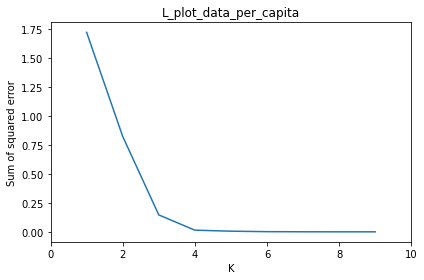

In [30]:
SSE_plot(dg,'Cases_per_Capita','Death_per_Capita','L_plot_data_per_capita')

,Date_reported,Country,WHO_region,Cumulative_cases,Cumulative_deaths,Population,Period_deaths,Period_cases,Cases_per_Capita,Death_per_Capita,cluster
14002,2020-04-30,Bangladesh,SEARO,0.231819,0.156425,167310838,0.156430,0.239433,0.058928,0.342572,0
20410,2020-04-30,Bhutan,SEARO,0.000000,0.000000,727145,0.000000,0.000000,0.010263,0.000000,0
78082,2020-04-30,India,SEARO,1.000000,1.000000,1366417754,1.000000,1.000000,0.029838,0.268156,0
79150,2020-04-30,Indonesia,SEARO,0.305995,0.737430,270203917,0.629559,0.270065,0.047663,1.000000,0
105850,2020-04-30,Maldives,SEARO,0.011773,0.000000,530953,0.000000,0.011794,1.000000,0.000000,1
118666,2020-04-30,Myanmar,SEARO,0.004328,0.005587,54045420,0.004798,0.004183,0.001053,0.037876,0
120802,2020-04-30,Nepal,SEARO,0.001513,0.000000,28608710,0.000000,0.001541,0.000000,0.000000,0
160318,2020-04-30,Sri Lanka,SEARO,0.019429,0.006518,21803000,0.004798,0.016480,0.037339,0.109534,0
166726,2020-04-30,Thailand,SEARO,0.089187,0.050279,69625582,0.042226,0.040886,0.054359,0.264601,0
168862,2020-04-30,Timor-Leste,SEARO,0.000514,0.000000,3500000,0.000000,0.000629,0.006540,0.000000,0


execution time = 0.029088973999023438


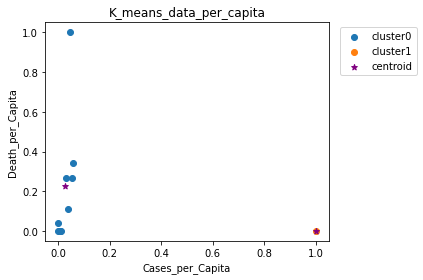

In [31]:
k_means(2,dg,'Cases_per_Capita','Death_per_Capita','K_means_data_per_capita')

execution time = 0.0212099552154541


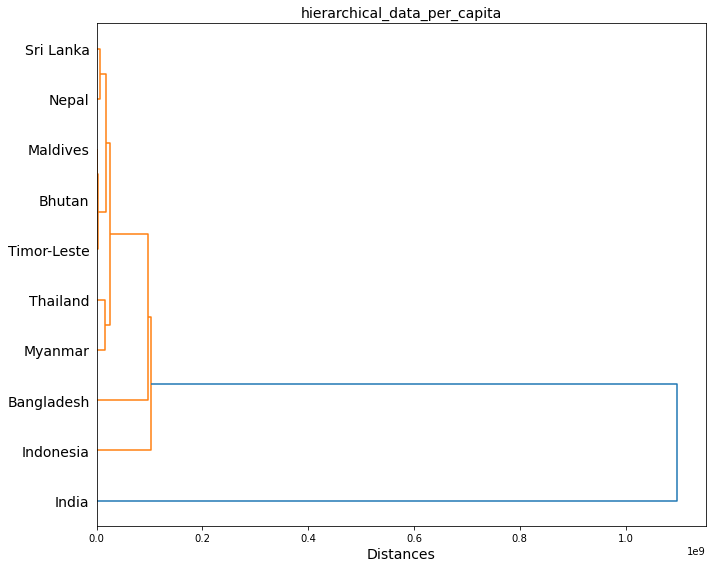

In [32]:
tree(dg,10,8,14,'hierarchical_data_per_capita')

This code defines a function called map_world which takes in two parameters:

data: the data set with locations data
name: a string that will be used as the title of the map and to save the figure.
The function creates a map using the folium library and specifying the tiles and the initial zoom level. Then, it plots on the map circles markers for each data point in the dataset. It also creates a marker cluster and plots a marker on the map for each data point with the country name, cumulative cases, cumulative deaths, population. The map is saved in the figures folder with the name passed as parameter. The function returns the map.

 

In [49]:
def map_world (data, name):
    map_world = folium.Map(
                           tiles = 'openstreetmap', 
                           zoom_start = 13)
    for lat, lng, label,Cc,Cd,P in zip(data.latitude,data.longitude,data.Country,data.Cumulative_cases,data.Cumulative_deaths,data.Population):
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=label,
            color='black',
            fill_color='red',
            ).add_to(map_world)
    
    marker_cluster = MarkerCluster().add_to(map_world)
    for lat, lng, label,Cc,Cd,P in zip(data.latitude,data.longitude,data.Country,data.Cumulative_cases,data.Cumulative_deaths,data.Population):
        folium.Marker(location=[lat,lng],
               popup = ['Country=',label,'Cumulative cases=',Cc,'Cumulative death=',Cd,'Population=',P],
               icon = folium.Icon(color='green')
        ).add_to(marker_cluster)

    map_world.add_child(marker_cluster)
    map_world.save(outfile=f'{FIGURES_PATH}/'+ name+'.html')
    return(map_world) 
    

In [50]:
T=merge2[(merge2['WHO_region']=='SEARO')&(merge2['Date_reported']=='2020-04-30')]
map_world(T, 'dati_SEARO')